# Do some installations with Python PIP for local openEO backend

In [1]:
import sys

In [2]:
sys.version

'3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:17) [GCC 12.2.0]'

In [1]:
pip install openeo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openeo_pg_parser_networkx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openeo_processes_dask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install dask_geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install planetary_computer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install stac_validator

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install openeo-processes-dask[implementations]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openeo-processes-dask[ml]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# openEO test case

## Do some imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from openeo.local import LocalConnection

In [3]:
import openeo_pg_parser_networkx
import openeo_processes_dask

print(openeo_pg_parser_networkx.__version__)
print(openeo_processes_dask.__version__)

2023.8.0
2023.8.1


In [4]:
import matplotlib.pyplot as plt

# Now start openEO

## Connect to local backend

In [5]:
local_conn = LocalConnection("./")

## Connect to STAC endpoint

In [6]:
stac_url = "https://geoservice.dlr.de/eoc/ogc/stac/v1/"

url = stac_url + "collections/S5P_TROPOMI_L3_P1D_O3/"

spatial_extent = {"east": 180.0, "south": -90.0,"west": -180.0, "north": 90.0}

## Define data cube

In [7]:
s5p_datacube = local_conn.load_stac(
    url=url,
    spatial_extent=spatial_extent,
    temporal_extent=["2023-09-01", "2023-09-15"],
    bands=["o3"]
)

## Build Process Graph (Median O$_3$)

In [8]:
task_reduce_time_median = s5p_datacube.reduce_dimension('time', reducer='median', context={"ignore_nodata": True})

In [9]:
task_reduce_lon_median = task_reduce_time_median.reduce_dimension('x', reducer='median', context={"ignore_nodata": True})

### Show Process Graph (Visual Representation)

In [10]:
task_reduce_lon_median

### Show Process Graph (JSON)

In [11]:
print (task_reduce_lon_median.to_json())

{
  "process_graph": {
    "loadstac1": {
      "process_id": "load_stac",
      "arguments": {
        "bands": [
          "o3"
        ],
        "spatial_extent": {
          "east": 180.0,
          "south": -90.0,
          "west": -180.0,
          "north": 90.0
        },
        "temporal_extent": [
          "2023-09-01",
          "2023-09-15"
        ],
        "url": "https://geoservice.dlr.de/eoc/ogc/stac/v1/collections/S5P_TROPOMI_L3_P1D_O3/"
      }
    },
    "reducedimension1": {
      "process_id": "reduce_dimension",
      "arguments": {
        "context": {
          "ignore_nodata": true
        },
        "data": {
          "from_node": "loadstac1"
        },
        "dimension": "time",
        "reducer": {
          "process_graph": {
            "median1": {
              "process_id": "median",
              "arguments": {
                "data": {
                  "from_parameter": "data"
                }
              },
              "result": true
    

## Execute Process Graph (Median O$_3$) and Show Result

In [12]:
result_median = task_reduce_lon_median.execute()

Text(0, 0.5, 'Latitude [deg]')

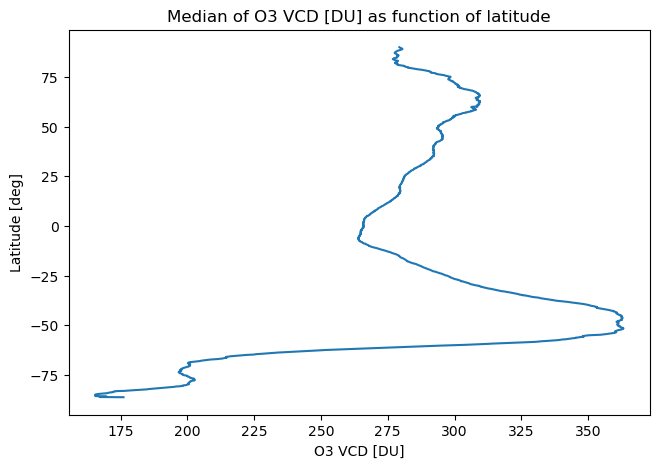

In [13]:
fig, ax = plt.subplots(1,1,figsize=(7.5,5))
ax.plot(result_median.values[0],result_median["y"][:])
ax.set_title ("Median of O3 VCD [DU] as function of latitude")
ax.set_xlabel ("O3 VCD [DU]")
ax.set_ylabel ("Latitude [deg]")

## Build Process Graph (Mean O$_3$)

In [14]:
task_reduce_time_mean = s5p_datacube.reduce_dimension('time', reducer='mean')

In [15]:
task_reduce_lon_mean = task_reduce_time_mean.reduce_dimension('x', reducer='mean')

### Process Graph: Visual Representation

In [16]:
task_reduce_lon_mean

### Process Graph: JSON Representation

In [17]:
print (task_reduce_lon_mean.to_json())

{
  "process_graph": {
    "loadstac1": {
      "process_id": "load_stac",
      "arguments": {
        "bands": [
          "o3"
        ],
        "spatial_extent": {
          "east": 180.0,
          "south": -90.0,
          "west": -180.0,
          "north": 90.0
        },
        "temporal_extent": [
          "2023-09-01",
          "2023-09-15"
        ],
        "url": "https://geoservice.dlr.de/eoc/ogc/stac/v1/collections/S5P_TROPOMI_L3_P1D_O3/"
      }
    },
    "reducedimension1": {
      "process_id": "reduce_dimension",
      "arguments": {
        "data": {
          "from_node": "loadstac1"
        },
        "dimension": "time",
        "reducer": {
          "process_graph": {
            "mean1": {
              "process_id": "mean",
              "arguments": {
                "data": {
                  "from_parameter": "data"
                }
              },
              "result": true
            }
          }
        }
      }
    },
    "reducedimension2

## Execute process graph (Mean O$_3$) and Show Result

In [18]:
result_mean = task_reduce_lon_mean.execute()

(-90.0, 90.0)

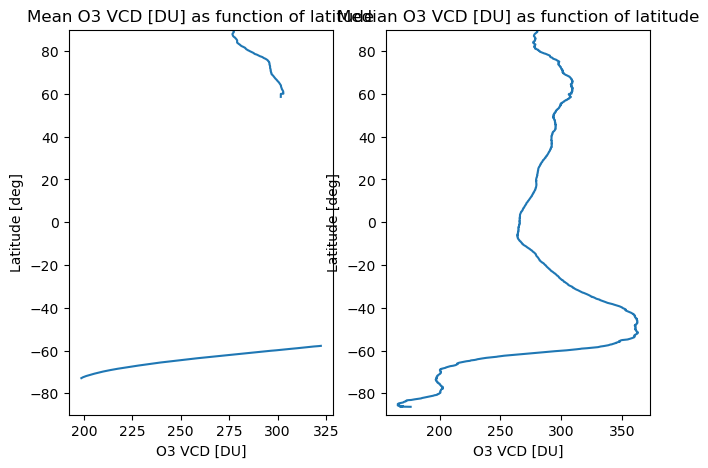

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(7.5,5))
ax[0].plot(result_mean.values[0],result_mean["y"][:])
ax[0].set_title ("Mean O3 VCD [DU] as function of latitude")
ax[0].set_xlabel ("O3 VCD [DU]")
ax[0].set_ylabel ("Latitude [deg]")
ax[0].set_ylim ([-90, 90])

ax[1].plot(result_median.values[0],result_mean["y"][:])
ax[1].set_title ("Median O3 VCD [DU] as function of latitude")
ax[1].set_xlabel ("O3 VCD [DU]")
ax[1].set_ylabel ("Latitude [deg]")
ax[1].set_ylim ([-90, 90])

## Data Structure of result_mean

In [20]:
result_mean

<xarray.DataArray 'stackstac-01183a025125420496494548fcd8964e' (band: 1, y: 1800)>
dask.array<mean_agg-aggregate, shape=(1, 1800), dtype=float64, chunksize=(1, 1024), chunktype=numpy.ndarray>
Coordinates: (12/23)
  * band                                 (band) <U2 'o3'
  * y                                    (y) float64 90.0 89.9 ... -89.8 -89.9
    proj:epsg                            int64 4326
    s5p:head_facility                    <U29 'German Aerospace Center (DLR)'
    s5p:south_pole_ozone_hole_area_unit  <U3 'km2'
    s5p:product_name                     <U2 'o3'
    ...                                   ...
    s5p:datasource                       <U48 'Sentinel-5P, TROPOMI, space-bo...
    s5p:processing_mode                  <U4 'NRTI'
    s5p:spatial_resolution               <U13 '5.5 x 3.5 km2'
    title                                <U2 'O3'
    description                          <U104 'TROPOMI/S5P L3 data of ozone ...
    epsg                                 int64 4326
Attributes:
    spec:                           RasterSpec(epsg=4326, bounds=(-180.0, -90...
    crs:                            epsg:4326
    transform:                      | 0.10, 0.00,-180.00|\n| 0.00,-0.10, 90.0...
    resolution:                     0.1
    reduced_dimensions_min_values:  {'time': numpy.datetime64('2023-09-01T00:...

In [21]:
# task_reduce_x = task_reduce_time.reduce_dimension('x', reducer='mean', context={"ignore_nodata": True})
# task = s5p_datacube.apply_dimension(process=nan_mean_function_0, dimension="y")